# Project 4 "Wrangle Data"
**Unfortunately, Twitter did not agree to give me the required data, but it was replaced by the data attached to this project.**

**Data Attached:**

- twitter-archive-enhanced.csv
- image-Predictions-3.tsv
- tweet-json copy.txt

In [1]:
conda install numpy pandas requests 

Solving environment: done

## Package Plan ##

  environment location: /Users/btool/opt/anaconda3

  added / updated specs:
    - numpy
    - pandas
    - requests


The following packages will be UPDATED:

  conda              conda-forge::conda-22.11.1-py39h6e949~ --> pkgs/main::conda-22.11.1-py39hecd8cb5_4 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c jmcmurray json

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge tweepy

Solving environment: done

## Package Plan ##

  environment location: /Users/btool/opt/anaconda3

  added / updated specs:
    - tweepy


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-22.11.1-py39hecd8cb5~ --> conda-forge::conda-22.11.1-py39h6e9494a_1 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as nm
import pandas as pd
import requests as rq
import tweepy as tw
import json 
import requests 
from collections import Counter

### CSV File.
#### 1- Gathering Data.

In [5]:
# install data in csv file 
data_csv = pd.read_csv('/Users/btool/Downloads/Project4/twitter-archive-enhanced-2.csv',header=0)

In [6]:
data_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2- Assess Data.

In [8]:
# - Tidiness:
## Merge 4 columns "doggo, floofer, pupper, puppo" in one column its have name "Type_of_Object".
## (doggo to 1, floofer to 2, pupper to 3, puppo to 4, multiple to 5, and 0 is non of these)

data_csv.loc[data_csv.doggo == 'None', 'doggo'] = ''
data_csv.loc[data_csv.floofer == 'None', 'floofer'] = ''
data_csv.loc[data_csv.pupper == 'None', 'pupper'] = ''
data_csv.loc[data_csv.puppo == 'None', 'puppo'] = ''

data_csv.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


In [9]:
data_csv['dogs'] = data_csv.doggo + data_csv.floofer + data_csv.pupper + data_csv.puppo

data_csv.loc[data_csv.dogs == 'doggopupper', 'dogs'] = 'multiple'
data_csv.loc[data_csv.dogs == 'doggopuppo', 'dogs'] = 'multiple'
data_csv.loc[data_csv.dogs == 'doggofloofer', 'dogs'] = 'multiple'

data_csv.loc[data_csv.dogs == '', 'dogs'] = 'No_One'

In [10]:
## conditions
conditions = [
    (data_csv['dogs'] == 'doggo'),
    (data_csv['dogs'] == 'floofer') ,
    (data_csv['dogs'] == 'pupper') ,
    (data_csv['dogs'] == 'puppo'),
    (data_csv['dogs'] == 'multiple'),
    (data_csv['dogs'] == 'No_One'),
               ]

## create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4','5','0']

## create a new column and using our lists 
data_csv['Type_of_Object'] = nm.select(conditions, values)

In [11]:
data_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs,Type_of_Object
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,No_One,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,No_One,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,No_One,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,No_One,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,No_One,0


In [12]:
data_csv.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [13]:
# - Quality:
## Remove Duplicates:
data_csv.drop_duplicates(subset="tweet_id",
                    keep = False , inplace = True)

In [14]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dogs                        2356 

##### In this data, there are no duplication in the variable " tweet_id " 

In [15]:
## Missing Values:
print(data_csv.isnull().sum())

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
dogs                             0
Type_of_Object                   0
dtype: int64


In [16]:
data_csv = data_csv[data_csv.retweeted_status_id.isnull()]
data_csv = data_csv[data_csv.retweeted_status_user_id.isnull()]
data_csv = data_csv[data_csv.retweeted_status_timestamp.isnull()]

***As we can observe, there are missing values in some columns***

***But looking at the actual value of the missing data, we can say that it is not valuable as they are just people’s/ tweet identity*** 

***In addition, there is the (expanded_urls) value that is also not important***

***That’s why we are not using them.***

In [17]:
data_csv.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
               'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

#### 3- Clean Data.

In [18]:
data_csv_copy = data_csv.copy()

##### 1- Difine:
1- Rename column "tweet_id" to "ID"

2- Replacing column "timestamp" with the "Hour" only to perform the appropriate analysis on it.

3- Delete columns have two or more variables in the same column we not need it.
**Such as :** source, text.

   - source: It contains two variables.

   - text: It contains three variables.

4- Delete all column we dont use it "rating_numerator, rating_denominator, name, dogs"


##### 2- Code:

In [19]:
# 1- Rename column "tweet_id" to "ID":
data_csv_copy = data_csv_copy.rename(columns = {'tweet_id': 'ID'}, inplace = False)

In [20]:
# 2- Replacing column "timestamp" with the "Hour" only to perform the appropriate analysis on it.
data_csv_copy['timestamp'] = pd.to_datetime(data_csv_copy['timestamp'])
data_csv_copy['Hour']= data_csv_copy['timestamp'].dt.hour

In [21]:
data_csv_copy.drop(['timestamp'], axis=1, inplace=True)

In [22]:
# 3- Delete columns have two or more variables in the same column.
data_csv_copy.drop(['source','text'], axis=1, inplace=True)

In [23]:
# 4- Delete all column I dont need it "rating_numerator, rating_denominator, name":
data_csv_copy.drop(['rating_numerator','rating_denominator','name','dogs'], axis=1, inplace=True)

##### 3- Test:

In [24]:
data_csv_copy.head()

,ID,Type_of_Object,Hour
0,892420643555336193,0,16
1,892177421306343426,0,0
2,891815181378084864,0,0
3,891689557279858688,0,15
4,891327558926688256,0,16


**From the above mentioned table, the name of column ID has been modified, moreover, unimportant columns have been deleted. Also, we added Hours as new column, and we merged the columns into one (Type_of_Object)**

In [25]:
data_csv_copy.nunique()

ID                2175
Type_of_Object       6
Hour                19
dtype: int64

***In the merge there are 5 values exactly as we wanted 0, 1, 2, 3 and 4***

### TSV File.
#### 1- Gathering Data.

In [26]:
# install data in tsv file with URL
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
R = requests.get(URL)
with open('image_predictions.tsv', 'wb') as file:
    file.write(R.content)
data_tsv = pd.read_csv('image_predictions.tsv', sep='\t')
data_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
data_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
data_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 2- Assess Data.

##### -Tidiness
In this data, all three conditions are fulfilled in the columns that I use it in the analysis.
   - Each variable forms a column.
   - Each observation forms a row.
   - Each type of observational unit forms a table.

In [29]:
# - Quality:
## Remove Duplicates:
data_tsv.drop_duplicates(subset="tweet_id",
                    keep = False , inplace = True)

In [30]:
data_tsv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


##### No duplication in the variable " tweet_id " 

In [31]:
## Missing Values:
print(data_tsv.isnull().sum())

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


#####  No Missing value in the variable " tweet_id " 

#### 3- Clean Data.

In [32]:
data_tsv_copy = data_tsv.copy()

##### 1- Difine:
1- Replace True and False to 1 and 0 in p1_dog column.

2- Rename column "tweet_id" to "ID" and column "p1_dog" to "Is_It_Dog?".

3- Delete all column we dont use it "jpg_url, img_num, p1, p2, p3, p1_conf, p2_conf, p3_conf, p2_dog, p3_dog"

##### 2- Code:

In [33]:
# 1- Replace True and False in p1_dog column:
data_tsv_copy['p1_dog'].replace({True:1,False:0},inplace=True)

In [34]:
# 2- Rename column "tweet_id" to "ID" and column "p1_dog" to "Is_It_Dog?":
data_tsv_copy = data_tsv_copy.rename(columns = {'tweet_id': 'ID', 'p1_dog': 'Is_It_Dog?'}, inplace = False)

In [35]:
# 3- Delete all column we dont use it "jpg_url, img_num, p1, p2, p3, p1_conf, p2_conf, p3_conf, p2_dog, p3_dog":
data_tsv_copy.drop(['jpg_url', 'img_num', 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf',
               'p3_conf', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

##### 3- Test:

In [36]:
data_tsv_copy.head()

,ID,Is_It_Dog?
0,666020888022790149,1
1,666029285002620928,1
2,666033412701032449,1
3,666044226329800704,1
4,666049248165822465,1


***From the above mentioned table, we modified the names of columns, unimportant columns have been deleted, also, we replaced the he columns (Is_It_Dog?).***

### TXT File.
#### 1- Gathering Data.

In [37]:
# install data in text file 
data_txt = pd.read_json('/Users/btool/Downloads/Project4/tweet-json.txt',lines=True)

In [38]:
data_txt.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [39]:
data_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### 2- Assess Data.

#### -Tidiness
In this data, all three conditions are fulfilled in the columns that I use it in the analysis.
   - Each variable forms a column.
   - Each observation forms a row.
   - Each type of observational unit forms a table.

In [40]:
# - Quality:
## Remove Duplicates:
data_txt.drop_duplicates(subset="id",
                    keep = False , inplace = True)

In [41]:
data_txt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

##### No duplication in the variable " id " 

In [42]:
## Missing Values:
print(data_txt.isnull().sum())

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

***As we can observe, there are missing values in some columns***

***But looking at the actual value of the missing data, we can say that it is not valuable as they are just people’s/ tweet identity*** 

***In addition, there is the (expanded_entities) value that is also not important, as it only represents tweet’s html which isn’t relevant to us***

***That’s why we are not using them.***

In [43]:
data_txt.drop(['extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id',
               'in_reply_to_user_id_str','in_reply_to_screen_name','geo','coordinates','place','contributors',
               'possibly_sensitive','possibly_sensitive_appealable','retweeted_status','quoted_status_id',
               'quoted_status_id_str','quoted_status'], axis=1, inplace=True)

In [44]:
## Incorrect Data:
data_txt.describe()

,id,id_str,retweet_count,favorite_count
count,2.354000e+03,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,8.924206e+17,79515.000000,132810.000000


##### there are no Incorrect data . 

#### 3- Clean Data.

In [45]:
data_txt_copy = data_txt.copy()

##### 1- Difine:
1- Rename column "id" to "ID" and column "retweet_count" to "Num_of_Retweet" and column "favorite_count" to "Num_of_Favorite".

2- Replacing column "created_at" with the "Hour" only to perform the appropriate analysis on it.

3- Delete columns have two or more variables in the same column we not need it.
**Such as :** full_text, user.

   - full_text: It contains two variables.

   - user: It contains three variables.
   
4- Delete all column We dont use it "created_at, id_str, truncated, display_text_range, entities, source, is_quote_status, favorited, retweeted, lang"

##### 2- Code:

In [46]:
# 1-Rename column "id" to "ID"and column "retweet_count"to"Num_of_Retweet" and column "favorite_count" to "Num_of_Favorite":
data_txt_copy = data_txt_copy.rename(columns = {'id': 'ID','retweet_count':'Num_of_Retweet',
                                      'favorite_count':'Num_of_Favorite'}, inplace = False)

In [47]:
# 2- Replacing column "created_at" with the "Hour" only to perform the appropriate analysis on it:
data_txt_copy['created_at'] = pd.to_datetime(data_txt_copy['created_at'])
data_txt_copy['Hour']= data_txt_copy['created_at'].dt.hour

In [48]:
data_txt_copy.drop(['created_at'], axis=1, inplace=True)

In [49]:
# 3- Delete columns have two or more variables in the same column we not need it.
data_txt_copy.drop(['full_text','user'], axis=1, inplace=True)

In [50]:
# 4- Delete all column We dont use it:
data_txt_copy.drop(['id_str','truncated','display_text_range','entities','source',
               'is_quote_status','favorited','retweeted','lang'], axis=1, inplace=True)

##### 3- Test:

In [51]:
data_txt_copy.head()

,ID,Num_of_Retweet,Num_of_Favorite,Hour
0,892420643555336193,8853,39467,16
1,892177421306343426,6514,33819,0
2,891815181378084864,4328,25461,0
3,891689557279858688,8964,42908,15
4,891327558926688256,9774,41048,16


##### As we can see from the above table
-the name of column ID has been modified

-unimportant columns have been deleted

-column Hour has been added.

### The Merge Table

In [52]:
M_Table = pd.merge(data_tsv_copy,data_csv_copy , on='ID' , how ='left')

In [53]:
Merge_Table = pd.merge(M_Table,data_txt_copy,on=['ID','Hour'],how='left')
Merge_Table.head()

,ID,Is_It_Dog?,Type_of_Object,Hour,Num_of_Retweet,Num_of_Favorite
0,666020888022790149,1,0,22.0,532.0,2535.0
1,666029285002620928,1,0,23.0,48.0,132.0
2,666033412701032449,1,0,23.0,47.0,128.0
3,666044226329800704,1,0,0.0,147.0,311.0
4,666049248165822465,1,0,0.0,41.0,111.0


In [54]:
Merge_Table_Copy = Merge_Table.copy()
Merge_Table_Copy.head()

,ID,Is_It_Dog?,Type_of_Object,Hour,Num_of_Retweet,Num_of_Favorite
0,666020888022790149,1,0,22.0,532.0,2535.0
1,666029285002620928,1,0,23.0,48.0,132.0
2,666033412701032449,1,0,23.0,47.0,128.0
3,666044226329800704,1,0,0.0,147.0,311.0
4,666049248165822465,1,0,0.0,41.0,111.0


In [55]:
Merge_Table_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2075 non-null   int64  
 1   Is_It_Dog?       2075 non-null   int64  
 2   Type_of_Object   1994 non-null   object 
 3   Hour             1994 non-null   float64
 4   Num_of_Retweet   1994 non-null   float64
 5   Num_of_Favorite  1994 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 113.5+ KB


#### 2- Assess Data.

##### -Tidiness
In this data, all three conditions are fulfilled in the columns that We use it in the analysis.
   - Each variable forms a column.
   - Each observation forms a row.
   - Each type of observational unit forms a table.

In [56]:
# - Quality:
## Remove Duplicates:
Merge_Table_Copy.drop_duplicates(subset="ID",
                    keep = False , inplace = True)

In [57]:
Merge_Table_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2075 non-null   int64  
 1   Is_It_Dog?       2075 non-null   int64  
 2   Type_of_Object   1994 non-null   object 
 3   Hour             1994 non-null   float64
 4   Num_of_Retweet   1994 non-null   float64
 5   Num_of_Favorite  1994 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 113.5+ KB


##### No duplication in the variable " ID " 

In [58]:
## Missing Values:
print(Merge_Table_Copy.isnull().sum())

ID                  0
Is_It_Dog?          0
Type_of_Object     81
Hour               81
Num_of_Retweet     81
Num_of_Favorite    81
dtype: int64


***We have four columns that have 81 missing values and we're going to deal with them so that we'll fill them of  the average***

In [59]:
Merge_Table_Copy.mean()

/var/folders/k5/26ns115j3ksdw2hlyyvfw1580000gn/T/ipykernel_12713/1072243983.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Merge_Table_Copy.mean()


ID                 7.384514e+17
Is_It_Dog?         7.383133e-01
Hour               9.720160e+00
Num_of_Retweet     2.766753e+03
Num_of_Favorite    8.895726e+03
dtype: float64

In [60]:
Merge_Table_Copy = Merge_Table_Copy.fillna(Merge_Table_Copy.mean())

/var/folders/k5/26ns115j3ksdw2hlyyvfw1580000gn/T/ipykernel_12713/1317662788.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Merge_Table_Copy = Merge_Table_Copy.fillna(Merge_Table_Copy.mean())


In [61]:
print(Merge_Table_Copy.isnull().sum())

ID                  0
Is_It_Dog?          0
Type_of_Object     81
Hour                0
Num_of_Retweet      0
Num_of_Favorite     0
dtype: int64


***Now we dont have columns that have missing values, we're fill them of  the average***

In [62]:
# Incorrect Data.
Merge_Table_Copy.nunique()

ID                 2075
Is_It_Dog?            2
Type_of_Object        6
Hour                 19
Num_of_Retweet     1596
Num_of_Favorite    1851
dtype: int64

In [63]:
Merge_Table_Copy.describe()

,ID,Is_It_Dog?,Hour,Num_of_Retweet,Num_of_Favorite
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2075.000000
mean,7.384514e+17,0.738313,9.720160,2766.753260,8895.725677
std,6.785203e+16,0.439659,8.447234,4582.504227,11972.325061
min,6.660209e+17,0.000000,0.000000,16.000000,81.000000
25%,6.764835e+17,0.000000,1.000000,651.000000,2074.000000
50%,7.119988e+17,1.000000,9.720160,1443.000000,4397.000000
75%,7.932034e+17,1.000000,17.000000,3086.000000,10921.000000
max,8.924206e+17,1.000000,23.000000,79515.000000,132810.000000


##### No Incorrect data . 


#### 3- Clean Data.

In [64]:
Table_Copy = Merge_Table_Copy.copy()
Table_Copy.head()

,ID,Is_It_Dog?,Type_of_Object,Hour,Num_of_Retweet,Num_of_Favorite
0,666020888022790149,1,0,22.0,532.0,2535.0
1,666029285002620928,1,0,23.0,48.0,132.0
2,666033412701032449,1,0,23.0,47.0,128.0
3,666044226329800704,1,0,0.0,147.0,311.0
4,666049248165822465,1,0,0.0,41.0,111.0


***As we can see in the above table, there is no modification that mentions the data is clean***

### Data storage

In [65]:
Table_Copy.to_csv("twitter-archive-master.csv")

### Analysis & Visualization

In [66]:
# Are most of the pictures of dogs?
Frec_Dogs = Counter(Table_Copy["Is_It_Dog?"])
print(Frec_Dogs)

Counter({1: 1532, 0: 543})


In [67]:
Yes = round((1532 / (543+1532))*100)
No = round((543 / (543+1532))*100)

print("Yes is",Yes,"% and No is",No,"%")

Yes is 74 % and No is 26 %


**Are most of the pictures of dogs?**

Yes, The dogs represent 74% of the pictures.

In [68]:
# What type of dog is the most seen in pictures?
Frec_Types = Counter(Table_Copy["Type_of_Object"])
print(Frec_Types)

Counter({'0': 1688, '3': 203, nan: 81, '1': 63, '4': 22, '5': 11, '2': 7})


In [69]:
Most_Type = round((203 / (1688+203+63+22+11+7))*100)
print("The dog is the most seen in pictures Percentage is",Most_Type,"%")

The dog is the most seen in pictures Percentage is 10 %


***We have already mentioned above that the type represented by “3” is the pupper and is the dog most seen in pictures***

In [70]:
# Is there a relationship between Num_of_Retweet and Num_of_Favorite?
corr_matrix = Table_Copy.corr()
corr_matrix

,ID,Is_It_Dog?,Hour,Num_of_Retweet,Num_of_Favorite
ID,1.000000,0.111326,0.137970,0.395218,0.638814
Is_It_Dog?,0.111326,1.000000,0.018218,0.008358,0.053137
Hour,0.137970,0.018218,1.000000,0.052074,0.056692
Num_of_Retweet,0.395218,0.008358,0.052074,1.000000,0.912947
Num_of_Favorite,0.638814,0.053137,0.056692,0.912947,1.000000


***We are interested in the link between two (2) variables (i.e. number of retweets and number of likes) as these are two continuous variables.***

***The relationship between the two is positive and strong.***

***Meaning, when number of likes rises the number of retweets rises as well an vice versa.***

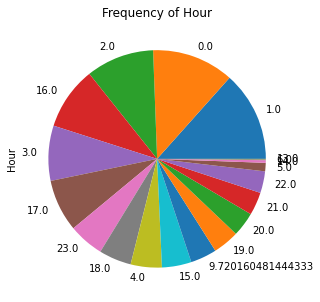

In [71]:
# What is the most time you post tweets?
Table_Copy['Hour'].value_counts().plot(kind='pie',figsize=(5,5),title='Frequency of Hour');

***From the above mentioned graphic we can see that most tweets is midnight (12 - 2 )***